In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

Week2: Implement Grover's algorithm of finding 10

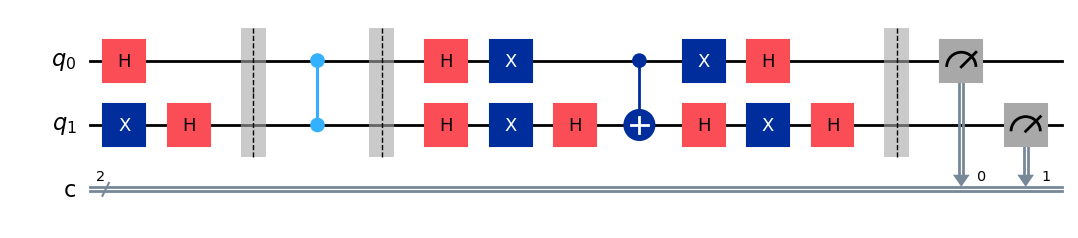

In [2]:
# grover's algorithm with 2 bits version 1
simulator = AerSimulator()
qc = QuantumCircuit(2,2)

qc.x(1)
qc.h(0)
qc.h(1)
qc.barrier()

qc.cz(0,1)

qc.barrier()
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x(0)
qc.x(1)

qc.h(0)
qc.h(1)

# do the flipping

qc.barrier()

qc.measure([0,1],[0,1])
display(qc.draw())

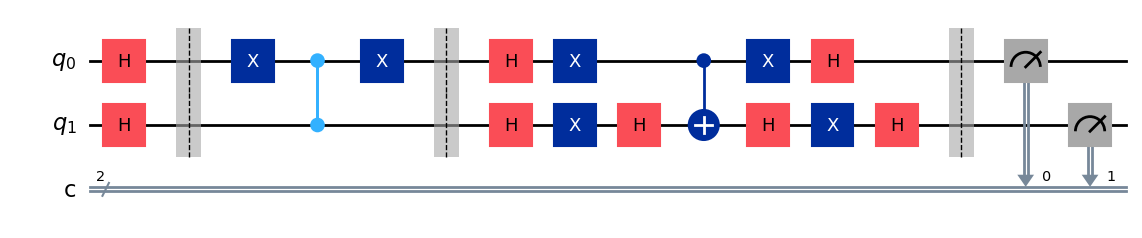

In [3]:
# grover's algorithm with 2 bits version 2
simulator = AerSimulator()
qc = QuantumCircuit(2,2)


qc.h(0)
qc.h(1)
qc.barrier()

qc.x(0)# why do we need this value?
qc.cz(0,1)
qc.x(0)

qc.barrier()
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x(0)
qc.x(1)

qc.h(0)
qc.h(1)

# do the flipping

qc.barrier()

qc.measure([0,1],[0,1])
display(qc.draw())


Total counts: {'10': 10000}


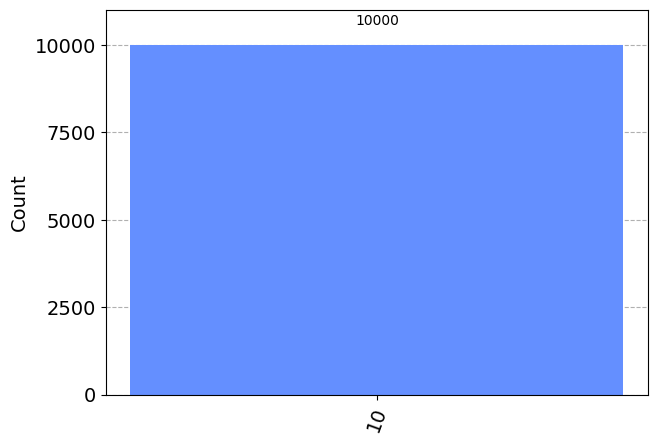

In [4]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)

plot_histogram(counts)

In [5]:
# with ancilla bit

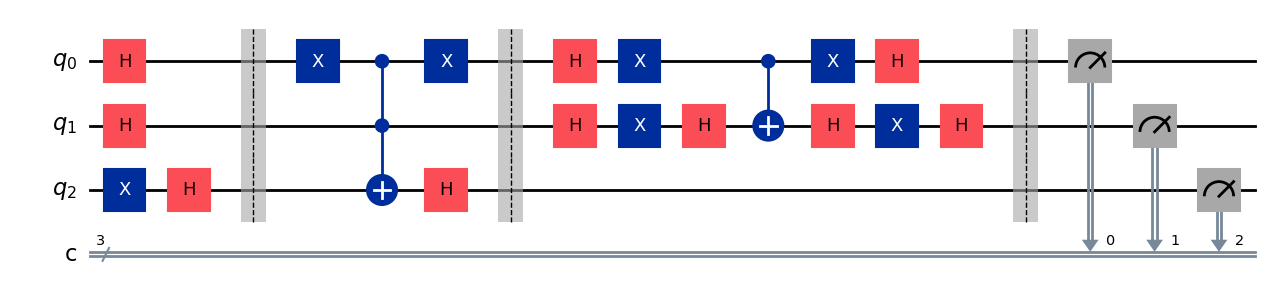

In [13]:
simulator = AerSimulator()
qc = QuantumCircuit(3,3)

#qc.h(0)
#qc.h(1)
for i in range(2):
    qc.h(i)

qc.x(2)
qc.h(2)
qc.barrier()
qc.x(0)
qc.mcx([0,1],2)
qc.h(2)
qc.x(0)
qc.barrier()
qc.h(0)
qc.h(1)
qc.x(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.x(0)
qc.x(1)

qc.h(0)
qc.h(1)

# do the flipping

qc.barrier()

qc.measure([0,1,2],[0,1,2])
display(qc.draw())


Total counts: {'110': 10000}


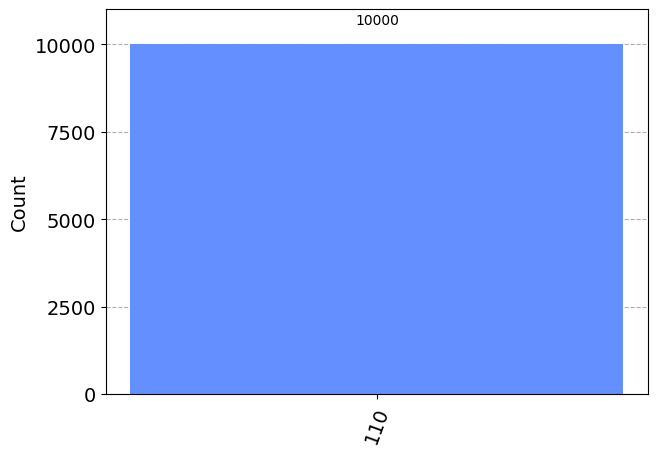

In [14]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(qc, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal counts:",counts)

plot_histogram(counts)

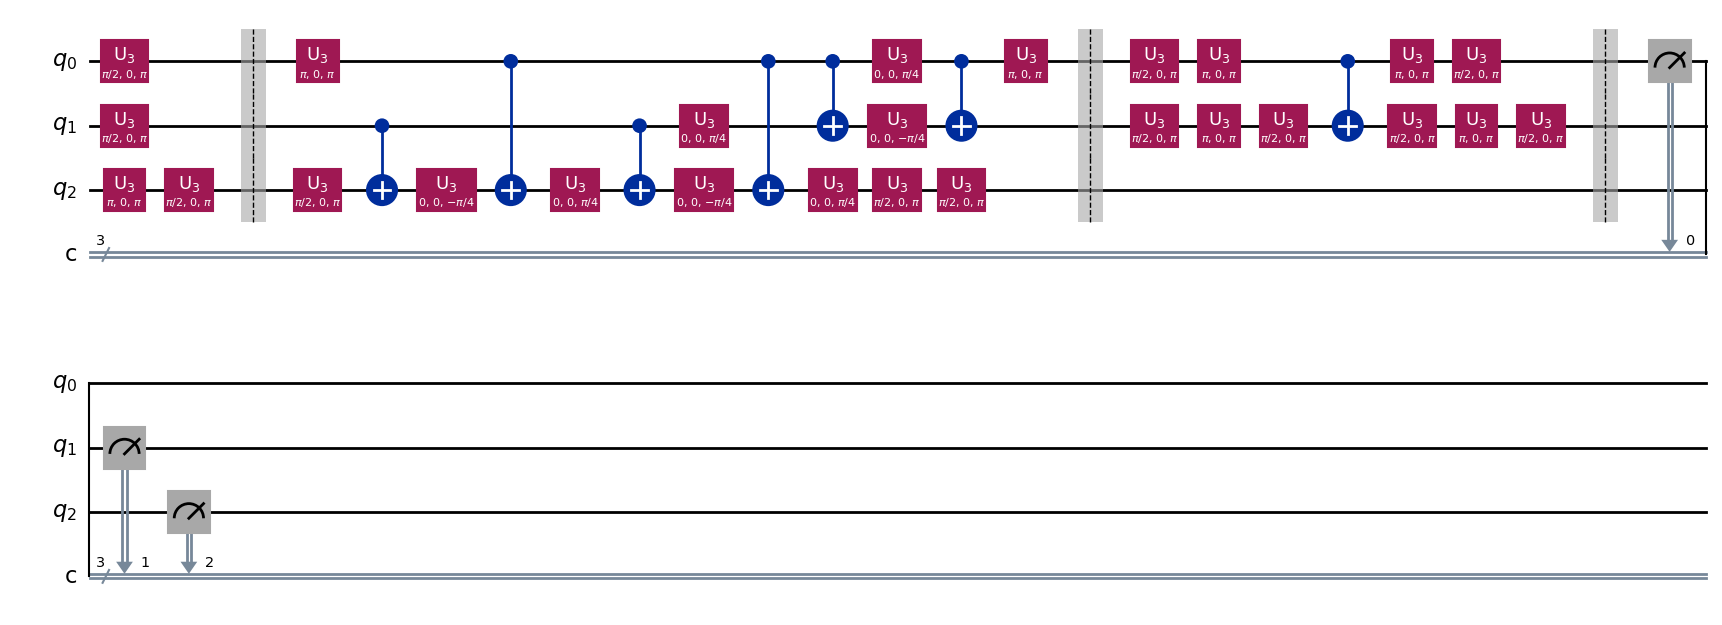

In [15]:
#now let's check the quantum cost of this circuit by using the Unroller.\
from qiskit.transpiler.passes import BasisTranslator, UnrollCustomDefinitions
from qiskit.transpiler import PassManager
from qiskit.circuit.library.standard_gates.equivalence_library import (StandardEquivalenceLibrary as std_eqlib,)

basis_gates = ['u3', 'cx']
pm = PassManager([
    #UnrollCustomDefinitions(std_eqlib, basis_gates)
    BasisTranslator(std_eqlib, basis_gates)
])

new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [ ]:
new_circuit.count_ops()

OrderedDict([('u3', 26), ('cx', 7), ('barrier', 3), ('measure', 3)])

Cost = 26 + 7*10  = 96